# Data Science for Business - <font color='orange'>PACMANN</font> AI
# <font color='blue'>Credit Default Prediction</font>

# Workflow ::
### 1. Import Library
* numpy 
* pandas 
* joblib

### 2. Import Dataset (importData)
* Load Data
* Check Shape
* Drop Duplicates
* Drop irrelevant column

### 3. Split Input-Output (extractInputOutput)
* data = data_input + data_output <br>
* data_input = data - data_output

### 4. Split Numerical & Categorical (splitNumCat)
* data_input = data_numerical + data_categorical <br>
* data_categorical = data - data_numerical


### 5. Data Imputation
* Numerical   :: fitImputNum + transformNumerical
* Categorical :: fillna("KOSONG")

### 6. Plotting

### <font color='blue'>  >> Feature Engineering </font>
* Outlier Handling
* Log Transform
* Square Feature

### 7. Numerical Standardizing (fitStandardize + transformNumerical)
### 8. Categorical Dummy ( pd.get_dummies() )
### 9. Join to data_train_clean
### 10. Modelling with Machine Learning

### <font color='blue'>  >> Feature Selection </font>
* L1 Regularization
* Backward Elimination

### <font color='blue'>  >> Modelling with selected feature </font>
### <font color='blue'>  >> Model Diagnosis </font>




## Import Library

In [1]:
import numpy as np
# import library pandas
import pandas as pd
# import library untuk save object
from sklearn.externals import joblib

# Import Dataset

In [2]:
# load data credit_default.csv
data = pd.read_csv("post test_lending.csv")

In [3]:
# menampilkan observasi teratas
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1355213,1599569,14000.0,14000.0,14000.0,36 months,13.67,476.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55008419,58579143,14400.0,14400.0,14400.0,36 months,12.29,480.29,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,26600.0,NaN,NaN,NaN
2,15590881,17683312,11000.0,11000.0,10950.0,36 months,9.17,350.67,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,8800.0,NaN,NaN,NaN
3,57366160,61068937,10000.0,10000.0,9950.0,60 months,12.69,225.95,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,43900.0,NaN,NaN,NaN
4,36250480,38961828,19800.0,19800.0,19700.0,36 months,6.99,611.28,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,87476.0,NaN,NaN,NaN


## Value Counts and Proportion

In [4]:
# cek proporsi kolom output
data["loan_status"].value_counts(normalize=True)

1    0.948616
0    0.051384
Name: loan_status, dtype: float64

# <font color = 'blue'> FUNCTION: importData

In [5]:
def importData(filepath, sep=',', drop=[]):
    '''
    Import data CSV ke dalam bentuk DataFrame
    
    Parameter
    ----------
    filepath : str,
        lokasi file data
    sep : str, default ','
        karakter pemisah pada data
    drop : list, default []
        list nama kolom untuk didrop
        
    Output
    -------
    data : DataFrame
    
    '''
     
    data = pd.read_csv(filepath, sep=sep)
    data = data.drop(drop,axis=1)   
    print("Banyaknya data", data.shape)

    print("Banyaknya data duplicate", data.duplicated().sum())

    data = data.drop_duplicates()
    
    print("Banyaknya data setelah di drop", data.shape)
    return data

In [6]:
# karena pymnt_plan, policy_code cuma 1 jenis
drop = ['id', 'member_id', 'pymnt_plan', 'url', 'policy_code', 'zip_code', 'emp_title', 'desc', 'title']

In [7]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'ope

In [8]:
data = importData('post test_lending.csv',sep=',', drop=drop)

Banyaknya data (43944, 60)
Banyaknya data duplicate 0
Banyaknya data setelah di drop (43944, 60)


# Split Input-Output

In [9]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,14000.0,14000.0,14000.0,36 months,13.67,476.25,B,B5,< 1 year,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14400.0,14400.0,14400.0,36 months,12.29,480.29,C,C1,6 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,26600.0,NaN,NaN,NaN
2,11000.0,11000.0,10950.0,36 months,9.17,350.67,B,B1,4 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,8800.0,NaN,NaN,NaN
3,10000.0,10000.0,9950.0,60 months,12.69,225.95,C,C2,6 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,43900.0,NaN,NaN,NaN
4,19800.0,19800.0,19700.0,36 months,6.99,611.28,A,A3,10+ years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,87476.0,NaN,NaN,NaN


data = data_input + data_output <br>
data_input = data - data_output

# <font color = 'blue'> FUNCTION: extractInputOutput

In [10]:
def extractInputOutput(data, output_col):
    '''
    Fungsi untuk memisahkan antara kolom data input dan output
    
    Parameter
    ----------
    data : DataFrame, 
        data yang hendak dipisahkan input-outputnya
    output_col : str, 
        kolom data output
        
    Output
    -------
    data_input  : DataFrame     
    data_output : DataFrame
    
    '''
    
    data_output = data[output_col]
    data_input = data.drop(output_col, axis=1)

    return data_input, data_output

In [11]:
x, y = extractInputOutput(data, 'loan_status')

In [12]:
x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,14000.0,14000.0,14000.0,36 months,13.67,476.25,B,B5,< 1 year,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14400.0,14400.0,14400.0,36 months,12.29,480.29,C,C1,6 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,26600.0,NaN,NaN,NaN
2,11000.0,11000.0,10950.0,36 months,9.17,350.67,B,B1,4 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,8800.0,NaN,NaN,NaN
3,10000.0,10000.0,9950.0,60 months,12.69,225.95,C,C2,6 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,43900.0,NaN,NaN,NaN
4,19800.0,19800.0,19700.0,36 months,6.99,611.28,A,A3,10+ years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,87476.0,NaN,NaN,NaN


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [14]:
# save column input
joblib.dump(x.columns, 'input_col.pkl')

['input_col.pkl']

# Train Test Split

In [15]:
# import library train_test_split
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state=123)

In [17]:
print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

(32958, 59) (32958,)
(10986, 59) (10986,)


# Missing Data

## Checking Missing Data

In [18]:
# cek missing data dari x_train
x_train.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                      1668
home_ownership                     0
annual_inc                         0
verification_status                0
purpose                            0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq         16934
mths_since_last_record         27952
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                        13
total_acc                          0
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
t

# Handling Missing Values
* Imputation 

## Missing Values Imputation

Data imputation adalah proses pengisian data yang memiliki data yang kosong, biasanya diperlihatkan sebagai NaN

Proses tersebut terbagi menjadi 2:
* Numerical Imputation
* Categorical Imputation

# Split Numeric and Categoric

data_input = data_numerical + data_categorical <br>
data_categorical = data - data_numerical

In [19]:
# soalnya float tapi banyaknya jenis data di bawah 5
watched = ['collections_12_mths_ex_med', 'acc_now_delinq']

In [20]:
# data.select_dtypes(['float64']).nunique()

# <font color = 'blue'> FUNCTION: splitNumCat

In [21]:
def splitNumCat(data, num_categorical):
    '''
    Fungsi untuk memisahkan kolom numerik dan kategorik
    
    Parameter
    ----------
    data : DataFrame, 
        data yang hendak dipisahkan numerik dan kategorik
    num_categorical : list, default []
        kolom kategorik yang berbentuk numerik.
        Misal bernilai 1 0 (Ya Tidak)
        
    Output
    -------
    data_num  : DataFrame     
    data_cat : DataFrame
    
    '''
    data_num = data._get_numeric_data()
    data_num = data_num.drop(num_categorical, axis = 1)
    data_cat = data.drop(list(data_num.columns.values) , axis = 1)

    return data_num, data_cat

In [22]:
x_train_numerical, x_train_categorical = splitNumCat(x_train, [])

In [23]:
x_train_numerical.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
37891,20000.0,20000.0,18260.96303,7.88,625.63,76000.0,12.52,0.0,0.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5450,8950.0,8950.0,8950.00000,14.99,310.22,31800.0,13.28,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6600.0,NaN,NaN,NaN
20180,5000.0,5000.0,5000.00000,7.26,154.99,70000.0,11.55,0.0,0.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,31500.0,NaN,NaN,NaN
34277,7225.0,7225.0,7225.00000,15.31,251.56,33000.0,17.53,1.0,2.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,16400.0,NaN,NaN,NaN
14156,18000.0,18000.0,18000.00000,21.18,488.79,91000.0,15.21,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44300.0,NaN,NaN,NaN


In [24]:
# num_cat = 
# x_train_numerical, x_train_categorical = splitNumCat(x_train, num_cat)

In [25]:
x_train_categorical.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,verification_status_joint
37891,36 months,A,A5,10+ years,MORTGAGE,Verified,debt_consolidation,CO,f,INDIVIDUAL,NaN
5450,36 months,C,C5,NaN,MORTGAGE,Verified,debt_consolidation,NV,w,INDIVIDUAL,NaN
20180,36 months,A,A4,10+ years,MORTGAGE,Not Verified,home_improvement,CA,w,INDIVIDUAL,NaN
34277,36 months,C,C4,10+ years,RENT,Not Verified,debt_consolidation,AL,f,INDIVIDUAL,NaN
14156,60 months,E,E3,9 years,MORTGAGE,Not Verified,debt_consolidation,TN,f,INDIVIDUAL,NaN


In [26]:
numerical =  x_train_numerical.columns # kolom numerik

In [27]:
# save column numeric
joblib.dump(numerical, 'numerical_col.pkl')

['numerical_col.pkl']

In [28]:
x_train_numerical.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,32958.000000,32958.000000,32958.000000,32958.000000,32958.000000,3.295800e+04,32958.000000,32958.000000,32958.000000,16024.000000,...,474.000000,414.000000,474.000000,474.000000,474.000000,474.000000,3.036800e+04,474.000000,474.000000,474.000000
mean,14761.950058,14749.827053,14709.610543,13.200539,436.855577,7.521347e+04,18.110919,0.307846,0.695431,34.055791,...,38365.675105,71.584058,1.388186,2.934599,5622.835443,60.029747,3.198295e+04,0.871308,1.466245,1.810127
std,8426.825613,8421.578750,8433.766445,4.366487,244.378487,6.982543e+04,8.259707,0.846049,0.997566,21.752120,...,44627.307298,21.607692,1.463130,2.520517,4832.789683,19.695340,3.145419e+04,1.384870,2.677903,2.946640
min,1000.000000,1000.000000,0.000000,5.320000,21.620000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,10774.000000,58.350000,0.000000,1.000000,2158.250000,48.125000,1.410000e+04,0.000000,0.000000,1.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.655000,0.000000,0.000000,31.000000,...,27671.000000,73.250000,1.000000,2.000000,4318.000000,60.850000,2.370000e+04,0.000000,0.000000,2.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,573.320000,9.000000e+04,23.870000,0.000000,1.000000,49.000000,...,48655.750000,87.475000,2.000000,4.000000,7349.000000,73.900000,3.990000e+04,1.000000,2.000000,3.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1406.080000,7.141778e+06,45.580000,20.000000,10.000000,139.000000,...,471609.000000,131.700000,10.000000,16.000000,30528.000000,119.500000,1.013700e+06,13.000000,22.000000,15.000000


In [29]:
categorical =  x_train_categorical.columns# kolom kategorik

In [30]:
# save column categorical
joblib.dump(categorical, 'categorical_col.pkl')

['categorical_col.pkl']

In [31]:
for col in x_train_categorical.columns:
    print(col)
    print(data[col].value_counts(normalize = True))
    print("===")

term
 36 months    0.700664
 60 months    0.299336
Name: term, dtype: float64
===
grade
B    0.288230
C    0.277057
A    0.168100
D    0.156199
E    0.080125
F    0.024122
G    0.006167
Name: grade, dtype: float64
===
sub_grade
B3    0.063285
B4    0.062602
C1    0.060304
C2    0.057004
C3    0.056936
C4    0.055753
B5    0.055298
B1    0.053727
B2    0.053318
A5    0.051247
C5    0.047060
D1    0.040028
A4    0.038185
D2    0.034089
D4    0.028923
D3    0.028855
A3    0.026875
A2    0.026215
A1    0.025578
D5    0.024304
E1    0.020754
E2    0.020071
E3    0.015770
E4    0.012835
E5    0.010695
F1    0.006941
F2    0.006167
F3    0.004870
F4    0.003732
F5    0.002412
G1    0.001957
G2    0.001707
G3    0.001115
G5    0.000728
G4    0.000660
Name: sub_grade, dtype: float64
===
emp_length
10+ years    0.346478
2 years      0.093436
< 1 year     0.084643
3 years      0.082702
5 years      0.068951
1 year       0.066723
4 years      0.063752
7 years      0.052180
8 years      0.050958
6 

# Missing Values Imputation

## Missing Values Imputation: Numerical 

In [32]:
# import library untuk imputation
from sklearn.preprocessing import Imputer

# <font color = 'blue'> FUNCTION: fitImputNum

In [33]:
# fitImputNum
from sklearn.preprocessing import Imputer
def fitImputNum(data, missing_values='NaN', strategy='median'):
    '''
    Fitting imputer untuk data numerik
    
    Parameter
    ----------
    data : DataFrame, 
        data kolom numerik
    missing_values : integer or "NaN", default 'NaN'
        The placeholder for the missing values. All occurrences of
        `missing_values` will be imputed.
    strategy : default 'median'
        The imputation strategy.
        - If "mean", then replace missing values using the mean along
          the axis.
        - If "median", then replace missing values using the median along
          the axis.
        - If "most_frequent", then replace missing using the most frequent
          value along the axis.
        
    Output
    -------
    imputer    : Object Imputer setelah difit
    
    '''
    imputer = Imputer(missing_values=missing_values, strategy = strategy)
    imputer.fit(data)
    return imputer

In [34]:
imput = fitImputNum(x_train_numerical, 'NaN', 'median')

In [35]:
# save imputer
joblib.dump(imput, 'imputer.pkl')

['imputer.pkl']

# <font color = 'blue'> FUNCTION: transformNumerical

In [36]:
# transformNumerical
def transformNumerical(data, transformer):
    '''
    Fungsi untuk transformasi data numerik menggunakan transformator yang sudah difitting
    
    Parameter
    ----------
    data : DataFrame, 
        data kolom numerik
    transform_:  Object,
        Dapat berupa Imputer atau Standardizer

    Output
    -------
    data_numeric_transform :  DataFrame     
    
    '''
    data_numeric = pd.DataFrame(transformer.transform(data))
    data_numeric.columns = data.columns
    data_numeric.index = data.index
  
    return data_numeric

In [37]:
x_train_num_imput = transformNumerical(x_train_numerical, imput)

## Missing Value: Categorical

In [38]:
# Cek data kosong pada data_categorical 
x_train_categorical.isnull().sum()

term                             0
grade                            0
sub_grade                        0
emp_length                    1668
home_ownership                   0
verification_status              0
purpose                          0
addr_state                       0
initial_list_status              0
application_type                 0
verification_status_joint    32934
dtype: int64

In [39]:
x_train_cat_imput = x_train_categorical.fillna("KOSONG") # mengisi data kosong dengan nilai KOSONG
x_train_cat_imput.head()# cek head


,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,verification_status_joint
37891,36 months,A,A5,10+ years,MORTGAGE,Verified,debt_consolidation,CO,f,INDIVIDUAL,KOSONG
5450,36 months,C,C5,KOSONG,MORTGAGE,Verified,debt_consolidation,NV,w,INDIVIDUAL,KOSONG
20180,36 months,A,A4,10+ years,MORTGAGE,Not Verified,home_improvement,CA,w,INDIVIDUAL,KOSONG
34277,36 months,C,C4,10+ years,RENT,Not Verified,debt_consolidation,AL,f,INDIVIDUAL,KOSONG
14156,60 months,E,E3,9 years,MORTGAGE,Not Verified,debt_consolidation,TN,f,INDIVIDUAL,KOSONG


In [40]:
x_train_cat_imput.isnull().sum()

term                         0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
verification_status          0
purpose                      0
addr_state                   0
initial_list_status          0
application_type             0
verification_status_joint    0
dtype: int64

# Plotting with Python

In [41]:
# menggabungkan data_numerical dan data_categorical yang sudah diimputasi dengan data_output
data_plot = pd.concat([x_train_num_imput, x_train_cat_imput, y_train], axis = 1)
data_plot.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,verification_status_joint,loan_status
37891,20000.0,20000.0,18260.96303,7.88,625.63,76000.0,12.52,0.0,0.0,29.0,...,A5,10+ years,MORTGAGE,Verified,debt_consolidation,CO,f,INDIVIDUAL,KOSONG,1
5450,8950.0,8950.0,8950.00000,14.99,310.22,31800.0,13.28,0.0,3.0,31.0,...,C5,KOSONG,MORTGAGE,Verified,debt_consolidation,NV,w,INDIVIDUAL,KOSONG,1
20180,5000.0,5000.0,5000.00000,7.26,154.99,70000.0,11.55,0.0,0.0,47.0,...,A4,10+ years,MORTGAGE,Not Verified,home_improvement,CA,w,INDIVIDUAL,KOSONG,1
34277,7225.0,7225.0,7225.00000,15.31,251.56,33000.0,17.53,1.0,2.0,16.0,...,C4,10+ years,RENT,Not Verified,debt_consolidation,AL,f,INDIVIDUAL,KOSONG,1
14156,18000.0,18000.0,18000.00000,21.18,488.79,91000.0,15.21,0.0,0.0,31.0,...,E3,9 years,MORTGAGE,Not Verified,debt_consolidation,TN,f,INDIVIDUAL,KOSONG,1


In [42]:
import matplotlib.pyplot as plt # import matplotlib.pyplot
import seaborn as sns           # import seaborn
%matplotlib inline 
sns.set_style('darkgrid')

In [43]:
# cek head dari data_plot
data_plot.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,verification_status_joint,loan_status
37891,20000.0,20000.0,18260.96303,7.88,625.63,76000.0,12.52,0.0,0.0,29.0,...,A5,10+ years,MORTGAGE,Verified,debt_consolidation,CO,f,INDIVIDUAL,KOSONG,1
5450,8950.0,8950.0,8950.00000,14.99,310.22,31800.0,13.28,0.0,3.0,31.0,...,C5,KOSONG,MORTGAGE,Verified,debt_consolidation,NV,w,INDIVIDUAL,KOSONG,1
20180,5000.0,5000.0,5000.00000,7.26,154.99,70000.0,11.55,0.0,0.0,47.0,...,A4,10+ years,MORTGAGE,Not Verified,home_improvement,CA,w,INDIVIDUAL,KOSONG,1
34277,7225.0,7225.0,7225.00000,15.31,251.56,33000.0,17.53,1.0,2.0,16.0,...,C4,10+ years,RENT,Not Verified,debt_consolidation,AL,f,INDIVIDUAL,KOSONG,1
14156,18000.0,18000.0,18000.00000,21.18,488.79,91000.0,15.21,0.0,0.0,31.0,...,E3,9 years,MORTGAGE,Not Verified,debt_consolidation,TN,f,INDIVIDUAL,KOSONG,1


# KDE+dist plot

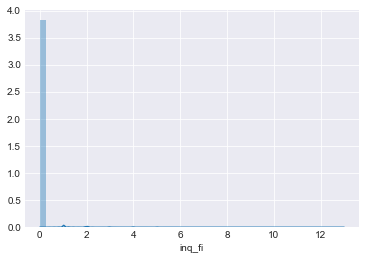

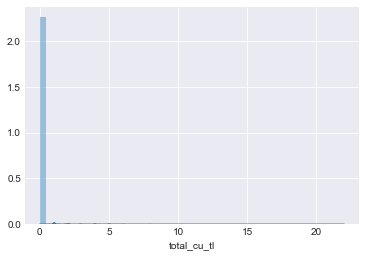

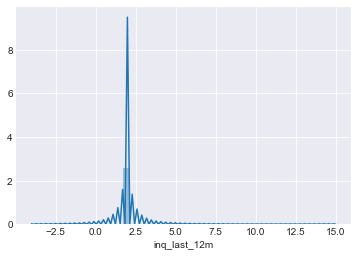

In [44]:
for col in numerical[45:50]: #Give Me Some Credit
    plt.figure()
    sns.distplot(data_plot[col])

In [45]:
temp = ['annual_inc', 'delinq_2yrs', 'pub_rec', 'revol_bal', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amnt', 'open_il_12m', 'inq_fi', 'total_cu_tl'
       ]

# Discriminate Output

### KDE plot

In [49]:
# for col in numerical:
#     plt.figure()
#     ax = sns.FacetGrid(data_plot, hue="loan_status", size=6)
#     ax.map(sns.kdeplot, col)
#     ax.add_legend()

In [50]:
# for col in numerical:
#     plt.figure()
#     sns.boxplot(x = data_plot['SeriousDlqin2yrs'], y = data_plot[col])

In [51]:
data_plot['loan_status'].value_counts(normalize=True)

1    0.949208
0    0.050792
Name: loan_status, dtype: float64

# Feature Engineering

## Data Transformation

### Select columns for data transform

In [52]:
# kolom numerik
numerical

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [53]:
num_col_transform = ['annual_inc', 'delinq_2yrs', 'pub_rec', 'revol_bal', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'open_il_12m', 'inq_fi', 'total_cu_tl'
       ]

In [54]:
# kolom yang perlu ditransformasi
num_col_transform

['annual_inc',
 'delinq_2yrs',
 'pub_rec',
 'revol_bal',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'open_il_12m',
 'inq_fi',
 'total_cu_tl']

In [55]:
# save nama kolom tersebut
joblib.dump(num_col_transform, 'num_col_transform.pkl')

['num_col_transform.pkl']

### Save median for each numerical columns

In [56]:
# menyiapkan series untuk menyimpan median
median_num_col = pd.Series([])

In [57]:
# mengambil median tiap kolom
for col in numerical:
    median_num_col[col] = x_train_num_imput[col].median()

In [58]:
median_num_col

loan_amnt                      13000.000
funded_amnt                    13000.000
funded_amnt_inv                13000.000
int_rate                          12.990
installment                      382.550
annual_inc                     65000.000
dti                               17.655
delinq_2yrs                        0.000
inq_last_6mths                     0.000
mths_since_last_delinq            31.000
mths_since_last_record            70.000
open_acc                          11.000
pub_rec                            0.000
revol_bal                      11901.000
revol_util                        56.100
total_acc                         24.000
out_prncp                       6517.650
out_prncp_inv                   6514.530
total_pymnt                     4910.450
total_pymnt_inv                 4887.705
total_rec_prncp                 3256.160
total_rec_int                   1082.760
total_rec_late_fee                 0.000
recoveries                         0.000
collection_recov

In [59]:
# save median
joblib.dump(median_num_col, 'median_num_col.pkl')

['median_num_col.pkl']

### Save threshold (3*std) for earch numerical columns

In [60]:
# menyiapkan series untuk menyimpan cuttoff 3std
cutoff_std = pd.Series([])

In [61]:
# mengambil cutoff tiap kolom
for col in numerical:
    cutoff_std[col] = x_train_num_imput[col].std()*3

In [62]:
# save cutoff
joblib.dump(cutoff_std, 'cutoff_std.pkl')

['cutoff_std.pkl']

In [63]:
cutoff_std

loan_amnt                       25280.476838
funded_amnt                     25264.736249
funded_amnt_inv                 25301.299336
int_rate                           13.099460
installment                       733.135462
annual_inc                     209476.297434
dti                                24.779122
delinq_2yrs                         2.538147
inq_last_6mths                      2.992697
mths_since_last_delinq             45.731123
mths_since_last_record             33.145172
open_acc                           15.939941
pub_rec                             1.722255
revol_bal                       62243.219580
revol_util                         71.652470
total_acc                          35.474741
out_prncp                       25339.649703
out_prncp_inv                   25329.651925
total_pymnt                     23461.901037
total_pymnt_inv                 23376.305050
total_rec_prncp                 19741.514241
total_rec_int                    6278.487797
total_rec_

In [64]:
def normalizeData(data_,
                  transform_column,
                  cutoff_point,
                  median_transform):
    '''
    Fungsi untuk transformasi data dengan :
        1. Mengganti nilai diatas 3std menjadi median
        2. Log transform tiap kolom
        
    Parameter
    ----------
    data_ : DataFrame, 
        data kolom numerik
    transform_column:  
        Kolom yang ditransformasi
    cutoff_point : DataFrame, 
        titik potong untuk diatas 3std
    median_transform:  Object,
        nilai median untuk mengganti nilai diatas 3std

    Output
    -------
    data :  DataFrame     
    
    '''

    # copy data_ ke data, agar tidak merusak nilai pada data input (x_train_numeric_imputed)
    data = data_.copy()
    
    # mengambil kolom yang perlu ditransformasi
    data = data[transform_column]
    
    # proses mengganti nilai diatas 3std dengan median
    for col in transform_column:
        data.loc[data[col]>cutoff_point[col], col] =  median_transform[col] 
        
        # log transform tiap kolom
        data[col] = np.log(data[col]+1)
        
    # menambahakan akhiran _log pada nama kolom
    data = data.add_suffix('_log')
        
    return data 

In [65]:
x_train_num_log  = normalizeData(x_train_num_imput, 
                                num_col_transform,
                                 cutoff_std,
                                 median_num_col)
x_train_num_log.head()

,annual_inc_log,delinq_2yrs_log,pub_rec_log,revol_bal_log,total_rec_late_fee_log,recoveries_log,collection_recovery_fee_log,last_pymnt_amnt_log,collections_12_mths_ex_med_log,acc_now_delinq_log,tot_coll_amt_log,open_il_12m_log,inq_fi_log,total_cu_tl_log
37891,11.238502,0.000000,0.0,9.524129,0.0,0.0,0.0,9.163788,0.0,0.0,0.0,0.0,0.0,0.0
5450,10.367253,0.000000,0.0,8.601350,0.0,0.0,0.0,5.740500,0.0,0.0,0.0,0.0,0.0,0.0
20180,11.156265,0.000000,0.0,9.374158,0.0,0.0,0.0,5.049792,0.0,0.0,0.0,0.0,0.0,0.0
34277,10.404293,0.693147,0.0,9.537484,0.0,0.0,0.0,5.531649,0.0,0.0,0.0,0.0,0.0,0.0
14156,11.418626,0.000000,0.0,10.645734,0.0,0.0,0.0,6.193977,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\ANTHONI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ANTHONI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ANTHONI\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


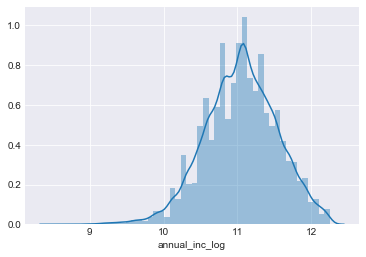

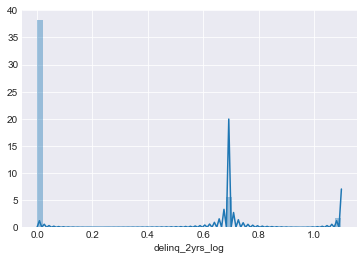

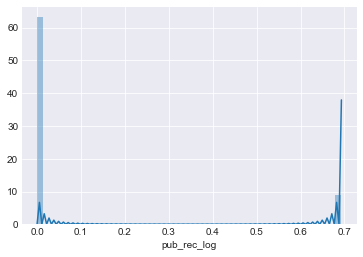

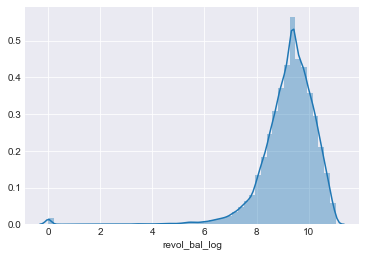

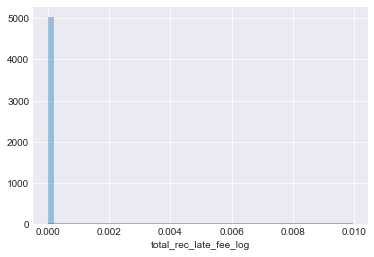

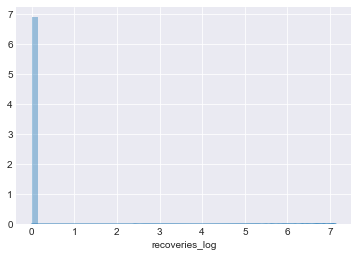

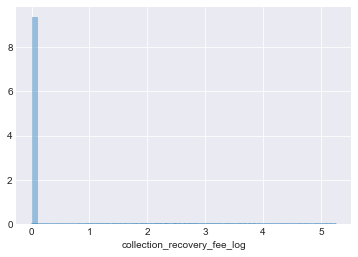

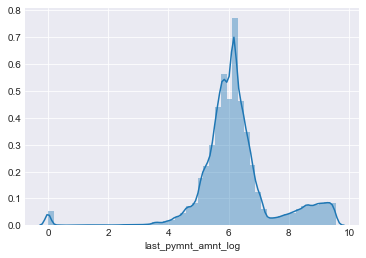

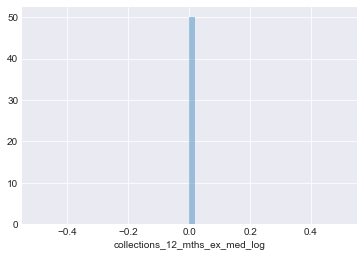

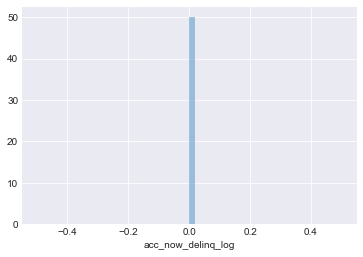

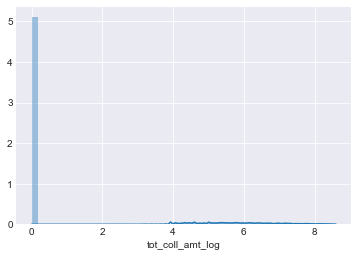

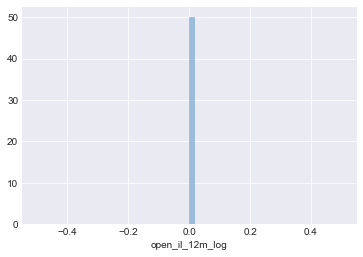

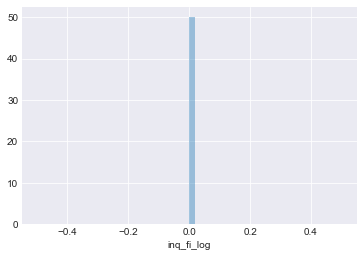

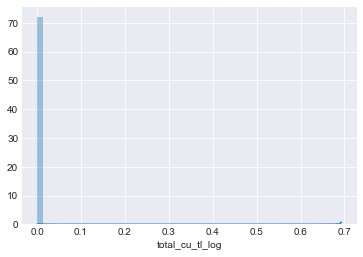

In [66]:
# melihat distribusi setelah transformasi
for col in num_col_transform:
    plt.figure()
    sns.distplot(x_train_num_log[col+'_log'])
    

## Square Feature

In [67]:
# menyiapkan dataframe untuk feature square
square_feature = pd.DataFrame()

In [68]:
# menghitung square dari tiap kolom feature
for col in x_train_num_log.columns:
    square_feature[col+'_square'] = x_train_num_log[col]**2

In [69]:
square_feature.head()

,annual_inc_log_square,delinq_2yrs_log_square,pub_rec_log_square,revol_bal_log_square,total_rec_late_fee_log_square,recoveries_log_square,collection_recovery_fee_log_square,last_pymnt_amnt_log_square,collections_12_mths_ex_med_log_square,acc_now_delinq_log_square,tot_coll_amt_log_square,open_il_12m_log_square,inq_fi_log_square,total_cu_tl_log_square
37891,126.303922,0.000000,0.0,90.709027,0.0,0.0,0.0,83.975019,0.0,0.0,0.0,0.0,0.0,0.0
5450,107.479935,0.000000,0.0,73.983230,0.0,0.0,0.0,32.953341,0.0,0.0,0.0,0.0,0.0,0.0
20180,124.462244,0.000000,0.0,87.874847,0.0,0.0,0.0,25.500398,0.0,0.0,0.0,0.0,0.0,0.0
34277,108.249316,0.480453,0.0,90.963592,0.0,0.0,0.0,30.599139,0.0,0.0,0.0,0.0,0.0,0.0
14156,130.385015,0.000000,0.0,113.331660,0.0,0.0,0.0,38.365348,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\ANTHONI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ANTHONI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ANTHONI\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


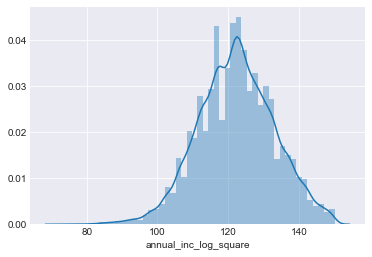

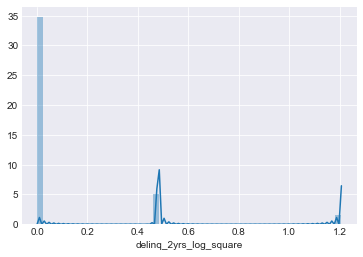

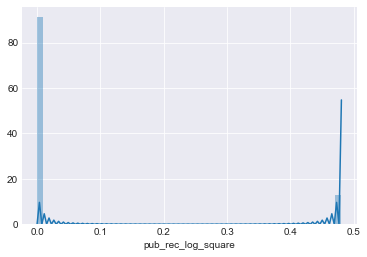

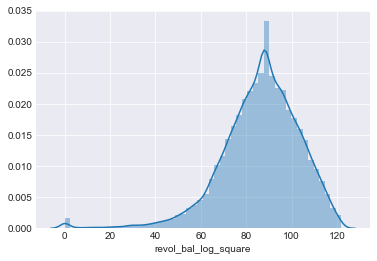

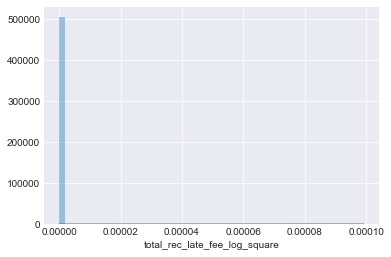

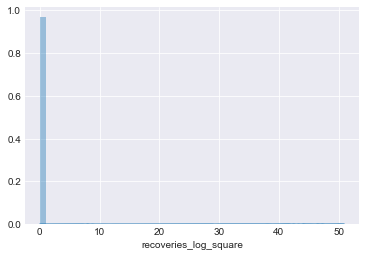

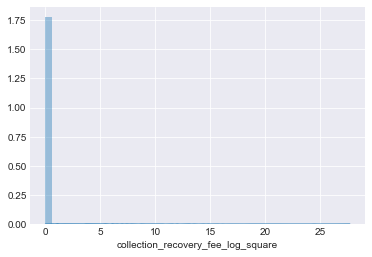

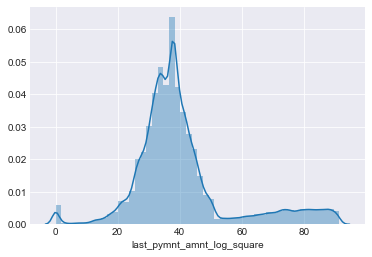

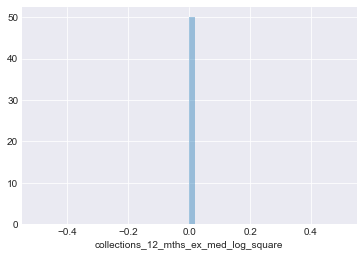

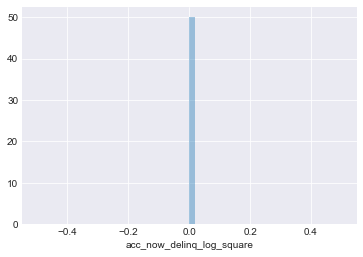

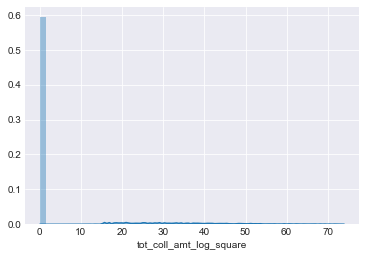

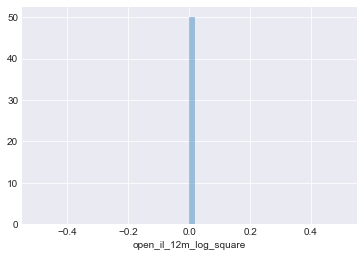

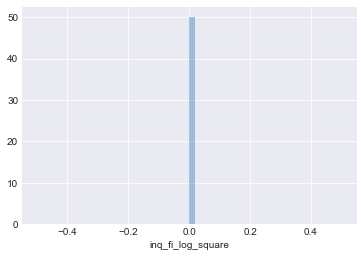

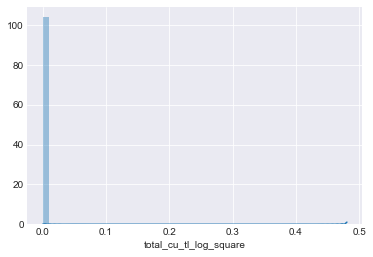

In [70]:
for col in square_feature.columns:
    plt.figure()
    sns.distplot(square_feature[col])
    

In [71]:
# membuat normalizeData dan square_feature ke dalam satu fungsi
def featureEngineering(data, 
                       transform_column, 
                       median_transform,
                      cutoff_point):
    
    '''
    Fungsi untuk feature engineering, melakukan:
        1. Mengganti nilai diatas 3std menjadi median, kemudian Log transform tiap kolom
        2. Membuat feature baru dengan mengkuadratkan nilai tiap kolom
        
    Parameter
    ----------
    data_ : DataFrame, 
        data kolom numerik
    transform_column:  
        Kolom yang ditransformasi
    median_transform:  Object,
        nilai median untuk mengganti nilai diatas 3std
    cutoff_point : DataFrame, 
        titik potong untuk diatas 3std


    Output
    -------
    data :  DataFrame     
    
    '''
    # normalizeData
    data_log = normalizeData(data,
                             transform_column,
                             cutoff_point,
                             median_transform)
    # square feature
    data_square_log = pd.DataFrame()
    for col in data_log.columns:
        data_square_log[col+'_square'] = data_log[col]**2
    
    # join
    data_num_log_square = pd.concat([data,
                                    data_log,
                                    data_square_log],
                                   axis = 1)

    return data_num_log_square

In [72]:
x_train_num_log_square = featureEngineering(x_train_num_imput,
                                            num_col_transform,
                                           median_num_col,
                                           cutoff_std)
x_train_num_log_square.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee_log_square,recoveries_log_square,collection_recovery_fee_log_square,last_pymnt_amnt_log_square,collections_12_mths_ex_med_log_square,acc_now_delinq_log_square,tot_coll_amt_log_square,open_il_12m_log_square,inq_fi_log_square,total_cu_tl_log_square
37891,20000.0,20000.0,18260.96303,7.88,625.63,76000.0,12.52,0.0,0.0,29.0,...,0.0,0.0,0.0,83.975019,0.0,0.0,0.0,0.0,0.0,0.0
5450,8950.0,8950.0,8950.00000,14.99,310.22,31800.0,13.28,0.0,3.0,31.0,...,0.0,0.0,0.0,32.953341,0.0,0.0,0.0,0.0,0.0,0.0
20180,5000.0,5000.0,5000.00000,7.26,154.99,70000.0,11.55,0.0,0.0,47.0,...,0.0,0.0,0.0,25.500398,0.0,0.0,0.0,0.0,0.0,0.0
34277,7225.0,7225.0,7225.00000,15.31,251.56,33000.0,17.53,1.0,2.0,16.0,...,0.0,0.0,0.0,30.599139,0.0,0.0,0.0,0.0,0.0,0.0
14156,18000.0,18000.0,18000.00000,21.18,488.79,91000.0,15.21,0.0,0.0,31.0,...,0.0,0.0,0.0,38.365348,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
joblib.dump(x_train_num_log_square, 'x_train_num_log_square.pkl')

['x_train_num_log_square.pkl']

# Numerical Standardizing


In [74]:
# import library untuk standardizing
from sklearn.preprocessing import StandardScaler

# <font color = 'blue'> FUNCTION: fitStandardize

In [75]:
from sklearn.preprocessing import StandardScaler
def fitStandardize(data):
    '''
    Fitting standardizer untuk data numerik
    
    Parameter
    ----------
    data : DataFrame, 
        data kolom numerik
        
    Output
    -------
    standard    : Object StandardScaler setelah difit
    
    '''
    standard = StandardScaler()
    standard.fit(data)
    return standard

In [76]:
standardizer = fitStandardize(x_train_num_log_square)

In [77]:
# save standardizer
joblib.dump(standardizer, 'standardizer.pkl')

['standardizer.pkl']

# <font color = 'blue'> FUNCTION: transformNumerical

In [78]:
x_train_num_std = transformNumerical(x_train_num_log_square, standardizer)

In [79]:
x_train_num_std.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee_log_square,recoveries_log_square,collection_recovery_fee_log_square,last_pymnt_amnt_log_square,collections_12_mths_ex_med_log_square,acc_now_delinq_log_square,tot_coll_amt_log_square,open_il_12m_log_square,inq_fi_log_square,total_cu_tl_log_square
37891,0.621602,0.623429,0.421094,-1.218513,0.772479,0.011264,-0.676901,-0.363869,-0.697138,-0.228669,...,-0.005508,-0.113238,-0.106311,2.688563,0.0,0.0,-0.34253,0.0,0.0,-0.049636
5450,-0.689707,-0.688697,-0.682933,0.409823,-0.518202,-0.621752,-0.584887,-0.363869,2.310229,-0.097465,...,-0.005508,-0.113238,-0.106311,-0.472004,0.0,0.0,-0.34253,0.0,0.0,-0.049636
20180,-1.158455,-1.157737,-1.151296,-1.360506,-1.153415,-0.074665,-0.794340,-0.363869,-0.697138,0.952164,...,-0.005508,-0.113238,-0.106311,-0.933681,0.0,0.0,-0.34253,0.0,0.0,-0.049636
34277,-0.894413,-0.893531,-0.887471,0.483110,-0.758243,-0.604566,-0.070333,0.818113,1.307773,-1.081493,...,-0.005508,-0.113238,-0.106311,-0.617836,0.0,0.0,-0.34253,0.0,0.0,-0.049636
14156,0.384261,0.385940,0.390151,1.827460,0.212520,0.226089,-0.351219,-0.363869,-0.697138,-0.097465,...,-0.005508,-0.113238,-0.106311,-0.136754,0.0,0.0,-0.34253,0.0,0.0,-0.049636


In [80]:
x_train_num_std.shape

(32958, 76)

# Categorical Dummy

In [81]:
# cek head dari data_categorical_imputed
x_train_cat_imput.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,verification_status_joint
37891,36 months,A,A5,10+ years,MORTGAGE,Verified,debt_consolidation,CO,f,INDIVIDUAL,KOSONG
5450,36 months,C,C5,KOSONG,MORTGAGE,Verified,debt_consolidation,NV,w,INDIVIDUAL,KOSONG
20180,36 months,A,A4,10+ years,MORTGAGE,Not Verified,home_improvement,CA,w,INDIVIDUAL,KOSONG
34277,36 months,C,C4,10+ years,RENT,Not Verified,debt_consolidation,AL,f,INDIVIDUAL,KOSONG
14156,60 months,E,E3,9 years,MORTGAGE,Not Verified,debt_consolidation,TN,f,INDIVIDUAL,KOSONG


In [82]:
x_train_cat_dummy = pd.get_dummies(x_train_cat_imput)
x_train_cat_dummy.head()

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,...,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_KOSONG,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
37891,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5450,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
20180,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
34277,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
14156,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


# Join Data Numerical Standard & Categorical Dummy

In [83]:
# gabungkan data_numerical, data_categorical, dan data_output
x_train_clean = pd.concat([x_train_num_std, x_train_cat_dummy], axis=1)

In [84]:
# cek head dari data
x_train_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_KOSONG,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
37891,0.621602,0.623429,0.421094,-1.218513,0.772479,0.011264,-0.676901,-0.363869,-0.697138,-0.228669,...,0,0,1,0,1,0,1,0,0,0
5450,-0.689707,-0.688697,-0.682933,0.409823,-0.518202,-0.621752,-0.584887,-0.363869,2.310229,-0.097465,...,0,0,0,1,1,0,1,0,0,0
20180,-1.158455,-1.157737,-1.151296,-1.360506,-1.153415,-0.074665,-0.794340,-0.363869,-0.697138,0.952164,...,0,0,0,1,1,0,1,0,0,0
34277,-0.894413,-0.893531,-0.887471,0.483110,-0.758243,-0.604566,-0.070333,0.818113,1.307773,-1.081493,...,0,0,1,0,1,0,1,0,0,0
14156,0.384261,0.385940,0.390151,1.827460,0.212520,0.226089,-0.351219,-0.363869,-0.697138,-0.097465,...,0,0,1,0,1,0,1,0,0,0


In [85]:
x_train_clean.isnull().sum()

loan_amnt                                    0
funded_amnt                                  0
funded_amnt_inv                              0
int_rate                                     0
installment                                  0
annual_inc                                   0
dti                                          0
delinq_2yrs                                  0
inq_last_6mths                               0
mths_since_last_delinq                       0
mths_since_last_record                       0
open_acc                                     0
pub_rec                                      0
revol_bal                                    0
revol_util                                   0
total_acc                                    0
out_prncp                                    0
out_prncp_inv                                0
total_pymnt                                  0
total_pymnt_inv                              0
total_rec_prncp                              0
total_rec_int

# <font color = 'blue'> FUNCTION: preprocessTest 
(call another function)

In [86]:
def preprocessTest(data,
                   numerical_col,
                   categorical_col, 
                   imputer,
                   standardizer,
                   transform_column, 
                    median_transform,
                   cutoff_point):

    # memisahkan numerical dan categorical
    data_numerical   = data[numerical_col]
    data_categorical = data[categorical_col]
    
    # categorical imputation
    data_categorical_imput = data_categorical.fillna("KOSONG")
    
    # dummy categorical
    data_categorical_dummy = pd.get_dummies(data_categorical_imput)
   
    # numerical imputation  
    data_numerical_imput = transformNumerical(data_numerical, imputer)
    
    # feature engineering
    data_numerical_eng = featureEngineering(data_numerical_imput,
                                            transform_column,
                                            median_transform,
                                            cutoff_point)
        
    # numerical standardizing
    data_numerical_std = transformNumerical(data_numerical_eng, standardizer)
    
    # join numerical and categorical (clean)
    data_train_clean = pd.concat([data_numerical_std, data_categorical_dummy], axis=1)
    
    return data_train_clean
    

In [87]:
numerical_col     = joblib.load("numerical_col.pkl")
categorical_col   = joblib.load("categorical_col.pkl")
imputer           = joblib.load("imputer.pkl")
standardizer      = joblib.load("standardizer.pkl") 
num_col_transform = joblib.load("num_col_transform.pkl")
median_num_col    = joblib.load("median_num_col.pkl")
cutoff_std        = joblib.load("cutoff_std.pkl")

In [88]:
# preprocess data test dengan function preprocessTest
x_test_clean = preprocessTest(x_test,
                              numerical_col, 
                              categorical_col,
                              imputer,
                              standardizer,
                              num_col_transform, 
                              median_num_col,
                              cutoff_std)
x_test_clean.head() # cek head

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_KOSONG,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
2529,0.028249,0.029707,0.034432,0.767095,0.387047,-0.289490,0.705736,0.818113,0.305317,-0.819085,...,0,0,0,1,1,0,1,0,0,0
23197,0.043083,0.044550,0.049254,0.409823,0.357584,-0.532958,0.285617,-0.363869,-0.697138,0.755359,...,0,0,1,0,1,0,1,0,0,0
20179,-1.294926,-1.294293,-1.287654,0.295313,-1.245405,-0.432707,-1.721748,-0.363869,-0.697138,-0.097465,...,0,0,0,1,1,0,1,0,0,0
35769,-0.802444,-0.801504,-0.795577,0.295313,-0.660975,0.068551,-0.581255,-0.363869,0.305317,0.558553,...,0,0,0,1,1,0,1,0,0,0
19995,0.384261,0.385940,0.390151,0.707550,0.014954,-0.131952,2.535126,-0.363869,-0.697138,-0.097465,...,0,0,0,1,1,0,1,0,0,0


In [171]:
x_train_clean.shape

(32958, 211)

# Modelling with Machine Learning


## Benchmark

In [90]:
# hitung benchmark pada data_train
y_train.value_counts(normalize=True)

1    0.949208
0    0.050792
Name: loan_status, dtype: float64

## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logreg = LogisticRegression(random_state=123)

In [93]:
logreg.fit(x_train_clean, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
logreg.score(x_train_clean, y_train)

0.9971175435402634

In [95]:
logreg.score(x_test_clean, y_test)

0.9958128527216458

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_train, logreg.predict(x_train_clean))

array([[ 1602,    72],
       [   23, 31261]], dtype=int64)

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_train, logreg.predict(x_train_clean)))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97      1674
          1       1.00      1.00      1.00     31284

avg / total       1.00      1.00      1.00     32958



In [100]:
print(classification_report(y_test, logreg.predict(x_test_clean)))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       584
          1       1.00      1.00      1.00     10402

avg / total       1.00      1.00      1.00     10986



## RandomForest 

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
random_forest = RandomForestClassifier(random_state=123)

In [103]:
random_forest.fit(x_train_clean, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [104]:
random_forest.score(x_train_clean, y_train)

0.9998179501183324

In [107]:
random_forest.score(x_test_clean, y_test)

0.9949026033133078

In [105]:
print(classification_report(y_train, random_forest.predict(x_train_clean)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1674
          1       1.00      1.00      1.00     31284

avg / total       1.00      1.00      1.00     32958



In [106]:
print(classification_report(y_test, random_forest.predict(x_test_clean)))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95       584
          1       1.00      1.00      1.00     10402

avg / total       0.99      0.99      0.99     10986



Model yang digunakan adalah model dari logistic regression karena lebih mudah untuk diinterpretasi (Dalam hal ini akurasinya serupa dengan random forest model)

# RandomSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV

## Logistic Regression

In [109]:
param = {'C': [1, 0.333, 0.1, 0.0333,
               0.01, 0.00333, 0.001]}

def logreg_cv(param, x_train, y_train):
    logreg = LogisticRegression(random_state = 123)
    
    logregCV = RandomizedSearchCV(logreg,
                       param_distributions = param,
                       n_iter= 3,
                       cv = 5,
                       random_state = 123,
                       verbose = 10)
    logregCV.fit(x_train, y_train)
    
    return logregCV

In [110]:
logreg_cv_fitted = logreg_cv(param,
                             x_train_clean,
                             y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=0.333 .........................................................
[CV] ................ C=0.333, score=0.9943871359223301, total=   3.9s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ................ C=0.333, score=0.9946905339805825, total=   3.7s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


[CV] ................ C=0.333, score=0.9934769417475728, total=   3.6s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s remaining:    0.0s


[CV] ................ C=0.333, score=0.9959041262135923, total=   2.5s
[CV] C=0.333 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.4s remaining:    0.0s


[CV] ................ C=0.333, score=0.9959028831562974, total=   4.0s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.6s remaining:    0.0s


[CV] ............... C=0.0333, score=0.9895327669902912, total=   2.2s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.0s remaining:    0.0s


[CV] ............... C=0.0333, score=0.9877123786407767, total=   2.4s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.5s remaining:    0.0s


[CV] ............... C=0.0333, score=0.9899878640776699, total=   2.3s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   26.0s remaining:    0.0s


[CV] ............... C=0.0333, score=0.9902912621359223, total=   2.5s
[CV] C=0.0333 ........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.7s remaining:    0.0s


[CV] ............... C=0.0333, score=0.9910470409711685, total=   2.5s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9857402912621359, total=   1.8s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9834648058252428, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.984375, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9863470873786407, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9846737481031866, total=   2.0s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   41.4s finished


In [111]:
logreg_cv_fitted.best_params_

{'C': 0.333}

In [112]:
# Accuracy di cross validation
logreg_cv_fitted.best_score_

0.9948722616663632

In [113]:
# Accuracy di training 
logreg_cv_fitted.score(x_train_clean, y_train)

0.9959038776624796

In [114]:
logreg_cv_fitted.score(x_test_clean, y_test)

0.9946295284908064

In [115]:
print(classification_report(y_train, logreg_cv_fitted.predict(x_train_clean)))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1674
          1       1.00      1.00      1.00     31284

avg / total       1.00      1.00      1.00     32958



In [116]:
print(classification_report(y_test, logreg_cv_fitted.predict(x_test_clean)))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95       584
          1       1.00      1.00      1.00     10402

avg / total       0.99      0.99      0.99     10986



In [117]:
joblib.dump(logreg_cv_fitted, "logreg_cv.pkl")

['logreg_cv.pkl']

# Feature Selection

### L1 Regulatization

In [119]:
# import SelectFromModel untuk feature selection
from sklearn.feature_selection import SelectFromModel

In [120]:
# feature selection menggunakan L1 regularization pada logreg
estimator = LogisticRegression(penalty='l1',
                               C=0.0333,
                              random_state=123)

In [121]:
# fit ke data train
estimator.fit(x_train_clean, y_train)

LogisticRegression(C=0.0333, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [122]:
# membuat object untuk feature selection
sfm = SelectFromModel(estimator,
                     prefit=True)

In [123]:
# melihat feature yang dipilih
sfm.get_support()

array([False, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [124]:
# index feature yang dipilih
selected_col_idx = np.where(sfm.get_support() == True)
selected_col_idx

(array([  2,   3,   4,   8,  10,  16,  17,  20,  22,  23,  25,  51,  53,
         54,  69, 205, 207], dtype=int64),)

In [125]:
# mengambil nama kolom yang dipilih
selected_col = x_train_clean.columns[selected_col_idx]

In [126]:
# feature x_train yang dipilih
x_train_select = x_train_clean[selected_col]
x_train_select.head()

,funded_amnt_inv,int_rate,installment,inq_last_6mths,mths_since_last_record,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,revol_bal_log,recoveries_log,collection_recovery_fee_log,last_pymnt_amnt_log_square,application_type_INDIVIDUAL,verification_status_joint_KOSONG
37891,0.421094,-1.218513,0.772479,-0.697138,0.004229,-0.995086,-0.995086,2.164615,-0.091432,-0.113455,1.563951,0.268175,-0.118358,-0.124862,2.688563,1,1
5450,-0.682933,0.409823,-0.518202,2.310229,0.004229,-0.377336,-0.377093,-0.307537,-0.091432,-0.113455,-0.383866,-0.566660,-0.118358,-0.124862,-0.472004,1,1
20180,-1.151296,-1.360506,-1.153415,-0.697138,0.004229,-0.508393,-0.508201,-0.739583,-0.091432,-0.113455,-0.416610,0.132497,-0.118358,-0.124862,-0.933681,1,1
34277,-0.887471,0.483110,-0.758243,1.307773,0.004229,-0.615469,-0.615320,-0.264018,-0.091432,-0.113455,-0.396239,0.280257,-0.118358,-0.124862,-0.617836,1,1
14156,0.390151,1.827460,0.212520,-0.697138,0.004229,0.655183,0.655834,-0.257553,-0.091432,-0.113455,-0.346198,1.282888,-0.118358,-0.124862,-0.136754,1,1


In [127]:
x_train_select.shape

(32958, 17)

In [128]:
# membuat x_train baru hasil feature selection
x_train_select = sfm.transform(x_train_clean)

In [129]:
# membuat x_test baru hasil feature selection
x_test_select = sfm.transform(x_test_clean)

In [130]:
logreg_select = LogisticRegression(C=0.0333,
                                   random_state=123)

In [131]:
logreg_select.fit(x_train_select, y_train)

LogisticRegression(C=0.0333, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [132]:
print(classification_report(y_train, logreg_select.predict(x_train_select)))

             precision    recall  f1-score   support

          0       0.98      0.81      0.88      1674
          1       0.99      1.00      0.99     31284

avg / total       0.99      0.99      0.99     32958



In [133]:
print(classification_report(y_test, logreg_select.predict(x_test_select)))

             precision    recall  f1-score   support

          0       0.98      0.81      0.88       584
          1       0.99      1.00      0.99     10402

avg / total       0.99      0.99      0.99     10986



# Model Diagnosis

In [134]:
# membuat dataframe berisi hasil probability dari model
proba_test = pd.DataFrame(logreg.predict_proba(x_test_clean))
proba_test = proba_test.add_prefix('proba_class_')
proba_test.index = y_test.index
proba_test.head()

,proba_class_0,proba_class_1
2529,5.975019e-06,0.999994
23197,6.788841e-05,0.999932
20179,5.648719e-03,0.994351
35769,1.432613e-03,0.998567
19995,9.706715e-09,1.000000


In [135]:
# menggabungkan dengan target asli dari data test
result_test = pd.concat([proba_test, y_test], axis = 1)
result_test.head()

,proba_class_0,proba_class_1,loan_status
2529,5.975019e-06,0.999994,1
23197,6.788841e-05,0.999932,1
20179,5.648719e-03,0.994351,1
35769,1.432613e-03,0.998567,1
19995,9.706715e-09,1.000000,1


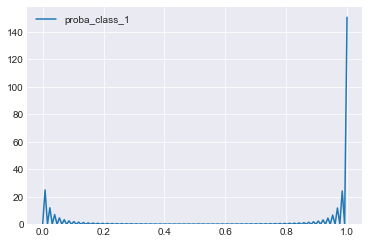

In [136]:
# distribusi probability untuk kelas 1 (default)
sns.kdeplot(result_test["proba_class_1"])

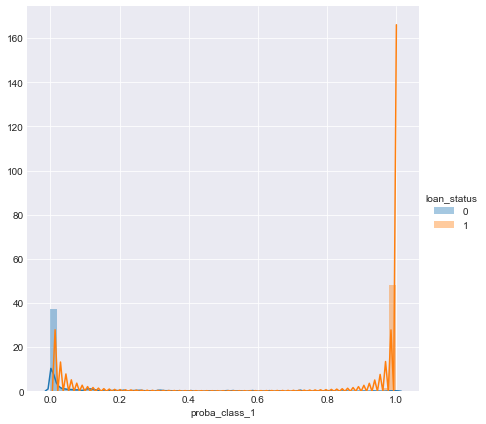

In [138]:
# melihat distribusi probability kelas 1 untuk tiap kelas asli
ax = sns.FacetGrid(result_test, hue="loan_status", size=6)
ax.map(sns.distplot, 'proba_class_1')
ax.add_legend()

In [139]:
# meski demikian akurasi pada test tetap tinggi
logreg.score(x_test_clean, y_test)

0.9958128527216458

Distribusi probability pada figure diatas dapat dikategorikan seperti gambar berikut :
<img src="img/class_distribution.png", align="middle">
src :: https://www.medcalc.org/manual/roc-curves.php

In [149]:
# membuat function untuk modelDiagnosis
def modelDiagnosis(x, y, model):
    proba_test = pd.DataFrame(model.predict_proba(x))
    proba_test = proba_test.add_prefix('proba_class_')
    proba_test.index = y.index
    
    result_test = pd.concat([proba_test, y], axis = 1)
    
    plt.figure()
    sns.kdeplot(result_test["proba_class_1"])
    
    plt.figure()
    ax = sns.FacetGrid(result_test, hue="loan_status", size=6)
    ax.map(sns.distplot, 'proba_class_1')
    ax.add_legend()
    

## modelDiagnosis :: Feature Selection - L1 Regularization

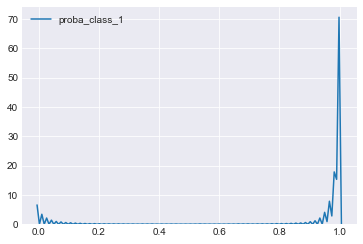

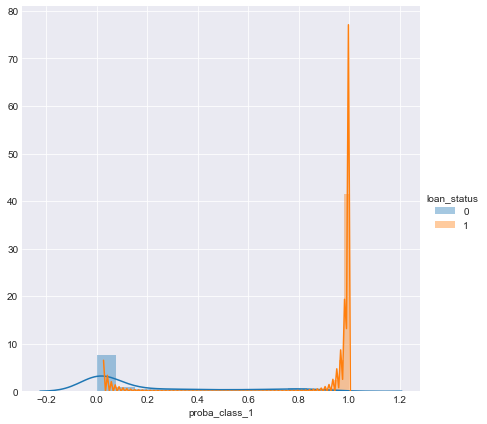

In [150]:
modelDiagnosis(x_test_select, y_test, logreg_select)

## modelDiagnosis :: Feature Selection - Backward Elimination

In [151]:
modelDiagnosis(x_test_backward, y_test, logreg_backward)

NameError: name 'x_test_backward' is not defined

# Balanced Weight

In [152]:
y_train.value_counts(normalize=True)

1    0.949208
0    0.050792
Name: loan_status, dtype: float64

### balanced-Logistic Regression

In [153]:
# fitting logistic Regression, dengan memberi bobot pada tiap kelas
# agar balanced
logreg_balanced = LogisticRegression(class_weight='balanced',
                                    random_state=123)

In [154]:
logreg_balanced.fit(x_train_clean, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [155]:
logreg_balanced.score(x_train_clean, y_train)

0.9973906183627648

In [156]:
logreg_balanced.score(x_test_clean, y_test)

0.9971782268341526

In [157]:
print(classification_report(y_test, logreg_balanced.predict(x_test_clean)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       584
          1       1.00      1.00      1.00     10402

avg / total       1.00      1.00      1.00     10986



## modelDiagnosis :: balanced-Logistic Regression

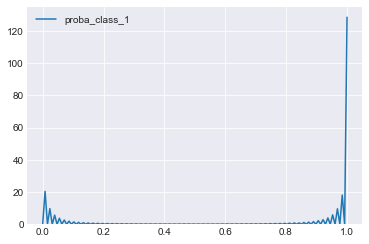

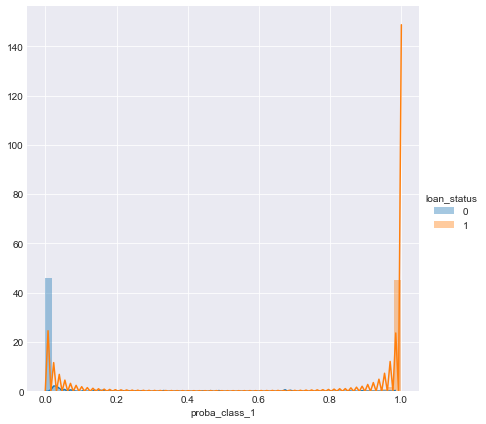

In [158]:
modelDiagnosis(x_test_clean, y_test, logreg_balanced)

# Predict

In [159]:
# mengambil sebagian data untuk prediksi
data_predict = x_test_clean.head(5)
data_predict.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_KOSONG,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
2529,0.028249,0.029707,0.034432,0.767095,0.387047,-0.289490,0.705736,0.818113,0.305317,-0.819085,...,0,0,0,1,1,0,1,0,0,0
23197,0.043083,0.044550,0.049254,0.409823,0.357584,-0.532958,0.285617,-0.363869,-0.697138,0.755359,...,0,0,1,0,1,0,1,0,0,0
20179,-1.294926,-1.294293,-1.287654,0.295313,-1.245405,-0.432707,-1.721748,-0.363869,-0.697138,-0.097465,...,0,0,0,1,1,0,1,0,0,0
35769,-0.802444,-0.801504,-0.795577,0.295313,-0.660975,0.068551,-0.581255,-0.363869,0.305317,0.558553,...,0,0,0,1,1,0,1,0,0,0
19995,0.384261,0.385940,0.390151,0.707550,0.014954,-0.131952,2.535126,-0.363869,-0.697138,-0.097465,...,0,0,0,1,1,0,1,0,0,0


In [160]:
# predict kelas
logreg_balanced.predict(data_predict)

array([1, 1, 1, 1, 1], dtype=int64)

In [161]:
# predict probability untuk tiap observarsi
logreg_balanced.predict_proba(data_predict)

array([[1.41900884e-06, 9.99998581e-01],
       [3.67737341e-05, 9.99963226e-01],
       [1.63508820e-02, 9.83649118e-01],
       [1.41259230e-03, 9.98587408e-01],
       [1.27338881e-05, 9.99987266e-01]])

In [162]:
score = logreg_balanced.predict_proba(data_predict)

# menampilkan scoring untuk tiap observasi
for i in range(0, data_predict.shape[0]):
    # karena kelas not default pada kelas 0
    # ambil score[index_observasi][kelas]*1000
    print(score[i][0]*1000)

0.0014190088365451103
0.036773734090611576
16.350882042666992
1.4125922982756167
0.012733888051452702


# Save to csv

In [163]:
# data test asli
x_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
2529,15000.0,15000.0,15000.0,36 months,16.55,531.44,D,D2,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,11300.0,NaN,NaN,NaN
23197,15125.0,15125.0,15125.0,36 months,14.99,524.24,C,C5,4 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,23500.0,NaN,NaN,NaN
20179,3850.0,3850.0,3850.0,36 months,14.49,132.51,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,3700.0,NaN,NaN,NaN
35769,8000.0,8000.0,8000.0,36 months,14.49,275.33,C,C4,8 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,8000.0,NaN,NaN,NaN
19995,18000.0,18000.0,18000.0,60 months,16.29,440.51,D,D2,10+ years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,37000.0,NaN,NaN,NaN


In [164]:
# predict proba untuk data test(clean)
proba_test = logreg_balanced.predict_proba(x_test_clean)

In [165]:
score_test = []
for i in range(0, proba_test.shape[0]):
    score_test.append(proba_test[i][0]*1000)

In [166]:
# menyimpan score ke dalam DataFrame
score_test_df = pd.DataFrame(score_test, index=x_test.index, columns=['Score'])
score_test_df.head()

,Score
2529,0.001419
23197,0.036774
20179,16.350882
35769,1.412592
19995,0.012734


In [167]:
# menggabungkan dengan kolom data asli
test_predict = pd.concat([x_test, score_test_df], axis = 1)
test_predict.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Score
2529,15000.0,15000.0,15000.0,36 months,16.55,531.44,D,D2,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,11300.0,NaN,NaN,NaN,0.001419
23197,15125.0,15125.0,15125.0,36 months,14.99,524.24,C,C5,4 years,RENT,...,NaN,NaN,NaN,NaN,NaN,23500.0,NaN,NaN,NaN,0.036774
20179,3850.0,3850.0,3850.0,36 months,14.49,132.51,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,3700.0,NaN,NaN,NaN,16.350882
35769,8000.0,8000.0,8000.0,36 months,14.49,275.33,C,C4,8 years,RENT,...,NaN,NaN,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,1.412592
19995,18000.0,18000.0,18000.0,60 months,16.29,440.51,D,D2,10+ years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,37000.0,NaN,NaN,NaN,0.012734


In [168]:
# simpan ke csv
test_predict.to_csv('predict_test_result.csv')